In [ ]:
#!pip install community


In [ ]:
import csv
import networkx as nx
from operator import itemgetter
import community
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('processed_cleveland_NOH.csv')
#Graphtype = nx.Graph()
#G = nx.MultiGraph()
G = nx.read_adjlist('diag_coro_art_dis_names_6S.csv',delimiter=',',create_using=nx.Graph())

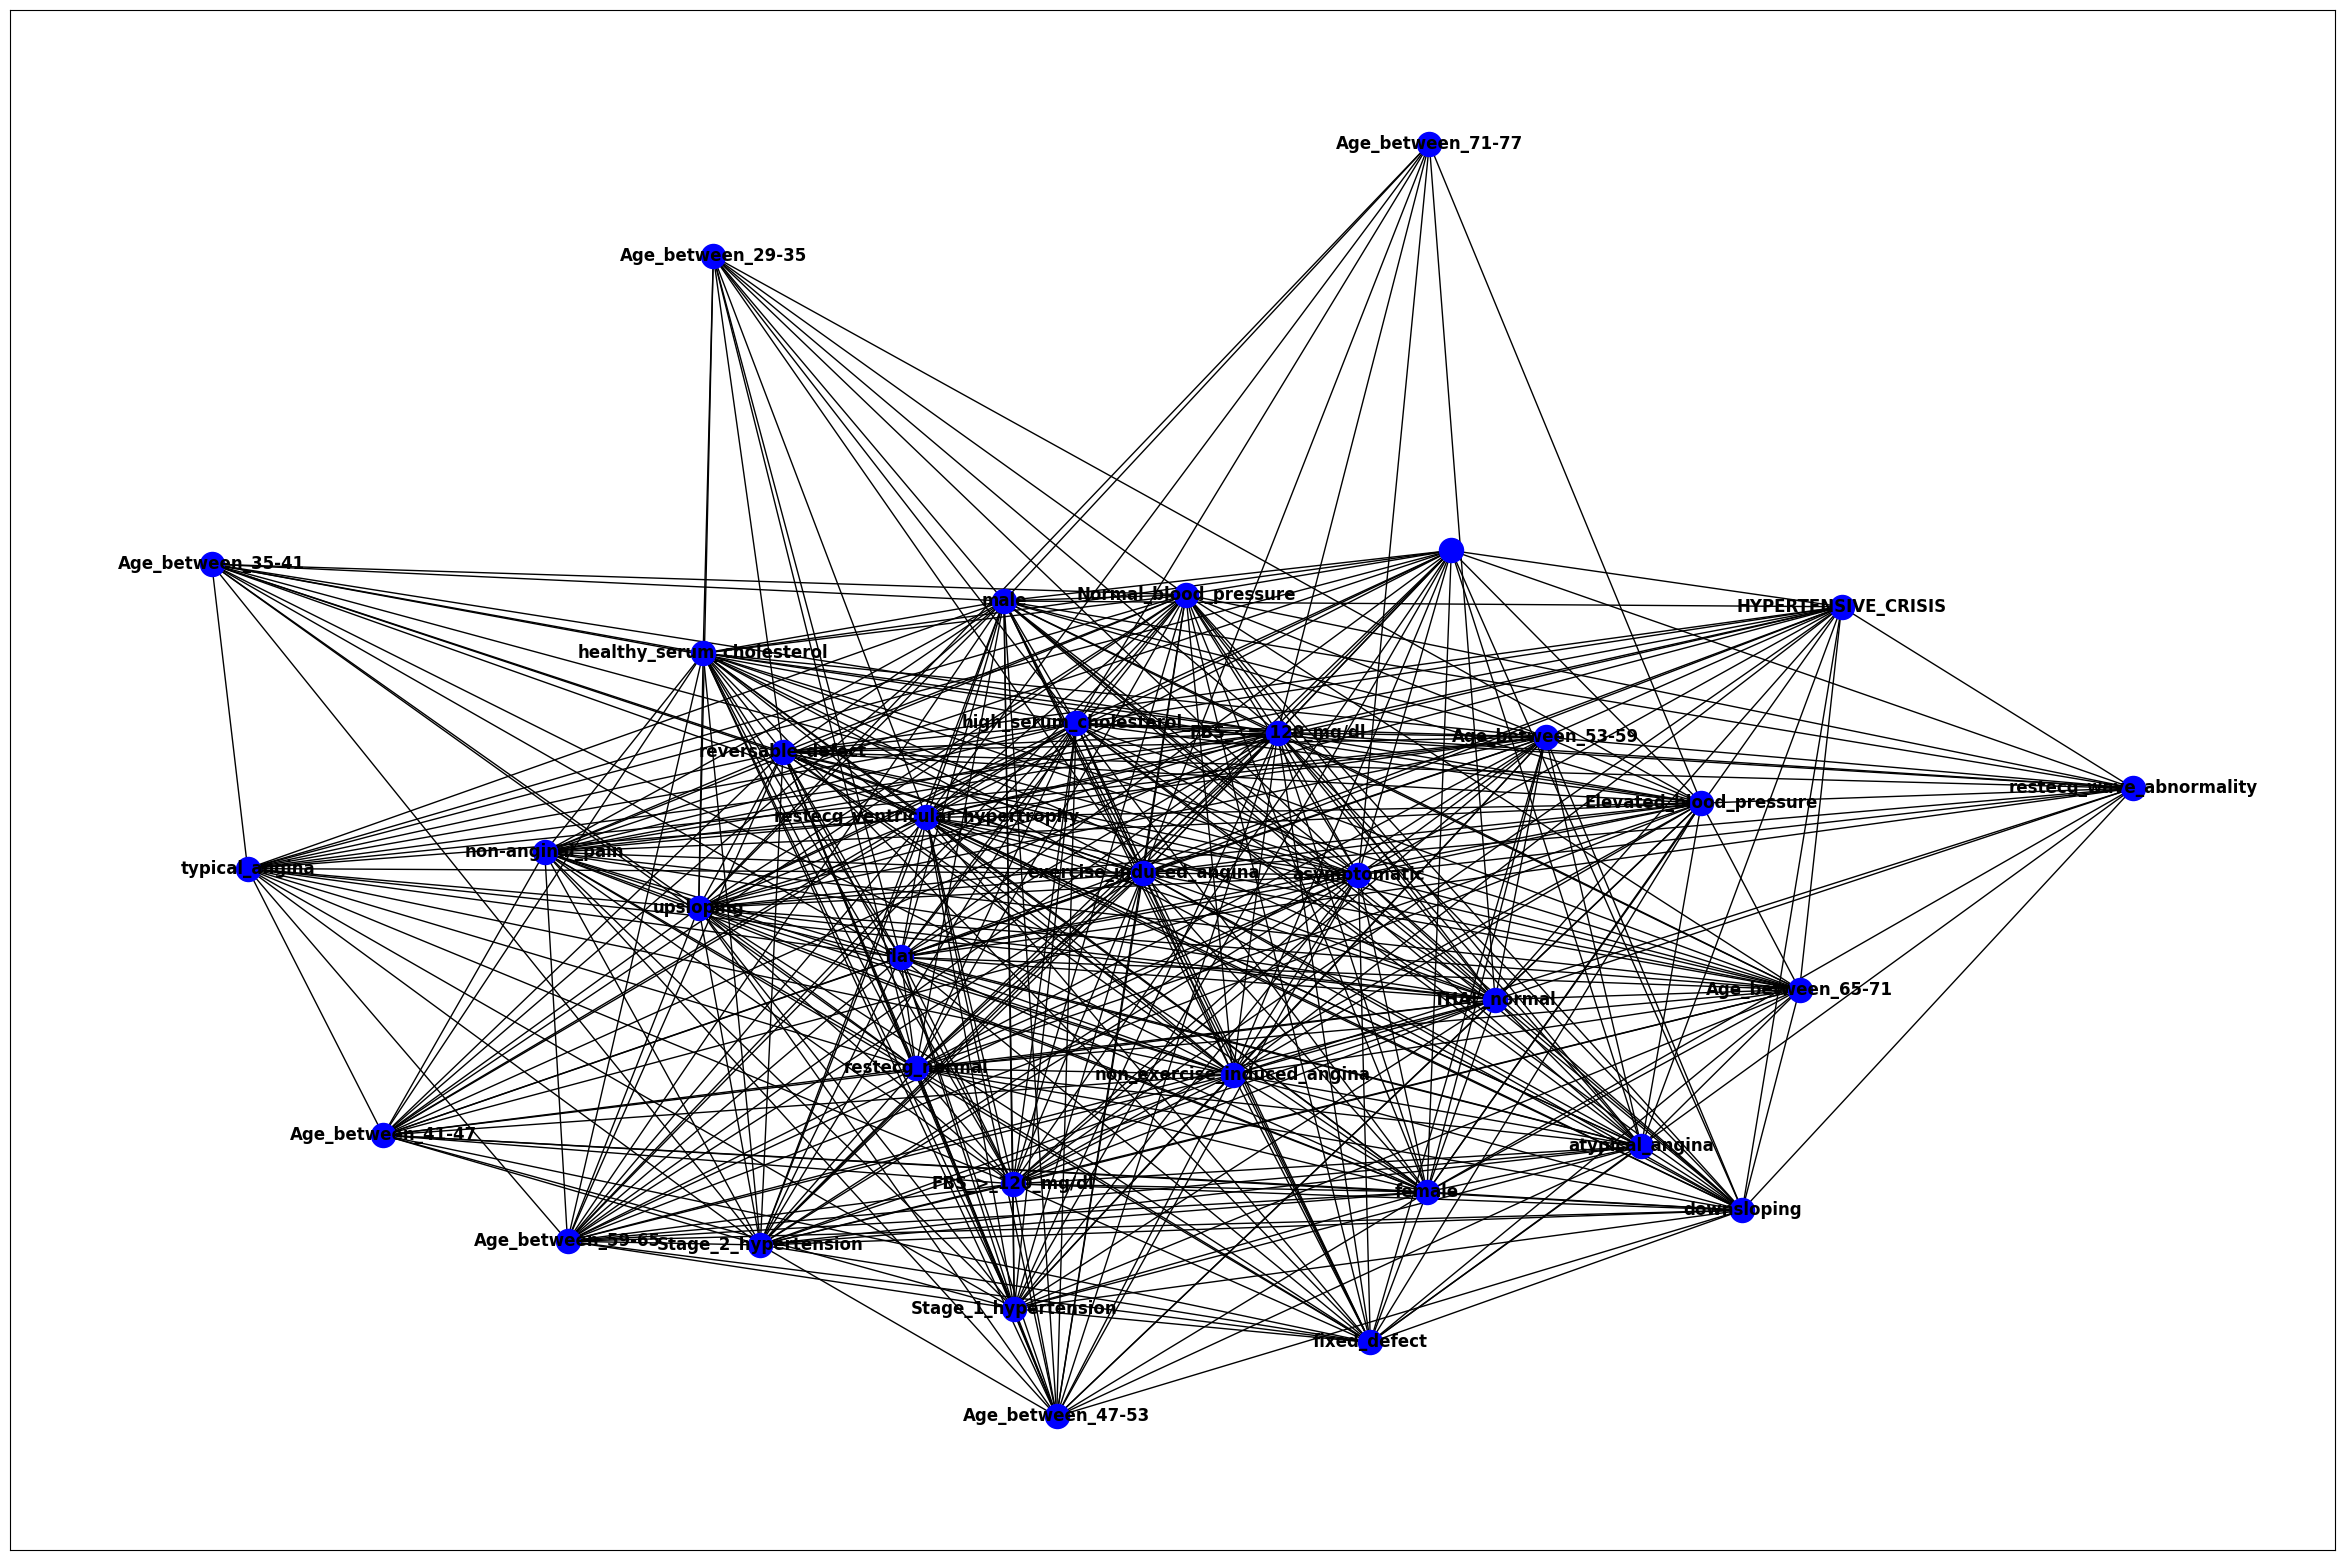

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
plt.figure(figsize=(30,20))
nx.draw_networkx(G, pos, node_size=300, node_color='blue', with_labels=True, font_weight='bold')

In [ ]:
print("degree centrality:")
for k, v in sorted(nx.degree_centrality(G).items(), key=lambda x: -x[1]):
      print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

print("eigenvector centrality:")
for k, v in sorted(nx.eigenvector_centrality(G).items(), key=lambda x: -x[1]):
      print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

print("between centrality:")
for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda x: -x[1]):
      print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

print("closeness centrality:")
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
      print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")

degree centrality:
male:0.971 high_serum_cholesterol_:0.971 FBS_<=_120_mg/dl:0.971 exercise_induced_angina:0.971 restecg_ventricular_hypertrophy:0.941 asymptomatic:0.912 flat:0.912 non_exercise_induced_angina:0.912 upsloping:0.912 reversable_defect:0.882 restecg_normal:0.882 THAL_normal:0.853 Normal_blood_pressure:0.853 female:0.853 FBS_>_120_mg/dl:0.853 healthy_serum_cholesterol:0.824 Stage_2_hypertension:0.794 downsloping:0.765 Stage_1_hypertension:0.765 Age_between_53-59:0.765 non-anginal_pain:0.765 Elevated_blood_pressure:0.765 fixed_defect:0.735 atypical_angina:0.735 Age_between_65-71:0.706 Age_between_59-65:0.706 :0.676 Age_between_47-53:0.647 Age_between_41-47:0.647 HYPERTENSIVE_CRISIS:0.588 typical_angina:0.588 restecg_wave_abnormality:0.5 Age_between_35-41:0.441 Age_between_29-35:0.382 Age_between_71-77:0.265 

eigenvector centrality:
high_serum_cholesterol_:0.201 male:0.2 FBS_<=_120_mg/dl:0.2 exercise_induced_angina:0.2 restecg_ventricular_hypertrophy:0.196 non_exercise_induc

In [ ]:
import numpy as np
import numpy.linalg as LA
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities

In [ ]:
!pip install gravis

centrality = nx.algorithms.degree_centrality(G)
nx.set_node_attributes(G, centrality, 'size')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import gravis as gv

c = nx.algorithms.community.greedy_modularity_communities(G,resolution=1.02, cutoff=3)
c


[frozenset({'Age_between_35-41',
            'Age_between_41-47',
            'Age_between_47-53',
            'Age_between_59-65',
            'FBS_>_120_mg/dl',
            'Normal_blood_pressure',
            'Stage_1_hypertension',
            'Stage_2_hypertension',
            'flat',
            'healthy_serum_cholesterol',
            'non-anginal_pain',
            'non_exercise_induced_angina',
            'restecg_normal',
            'reversable_defect',
            'typical_angina'}),
 frozenset({'',
            'Age_between_29-35',
            'Age_between_53-59',
            'Age_between_71-77',
            'Elevated_blood_pressure',
            'FBS_<=_120_mg/dl',
            'HYPERTENSIVE_CRISIS',
            'THAL_normal',
            'asymptomatic',
            'exercise_induced_angina',
            'high_serum_cholesterol_',
            'male',
            'restecg_wave_abnormality',
            'upsloping'}),
 frozenset({'Age_between_65-71',
            'atypical_a

In [ ]:
pos = nx.spring_layout(G)

#for name, (x, y) in pos.items():
#    node = G.nodes[name]
#    node['x'] = x
#    node['y'] = y


colors = ['red', 'blue', 'green','orange']
for community, color in zip(c, colors):
    for node in community:
        G.nodes[node]['color'] = color

#gv.vis(G, show_node_label=False, show_edge_label=True, edge_label_data_source='en')
#gv.three(G, use_edge_size_normalization=True)

gv.d3(G, use_node_size_normalization=True, node_size_normalization_max=30,
      use_edge_size_normalization=True,edge_size_data_source='weight',  edge_curvature=0.3,layout_algorithm_active=False,graph_height=500)


The coronay diagnosis has 3 communities.


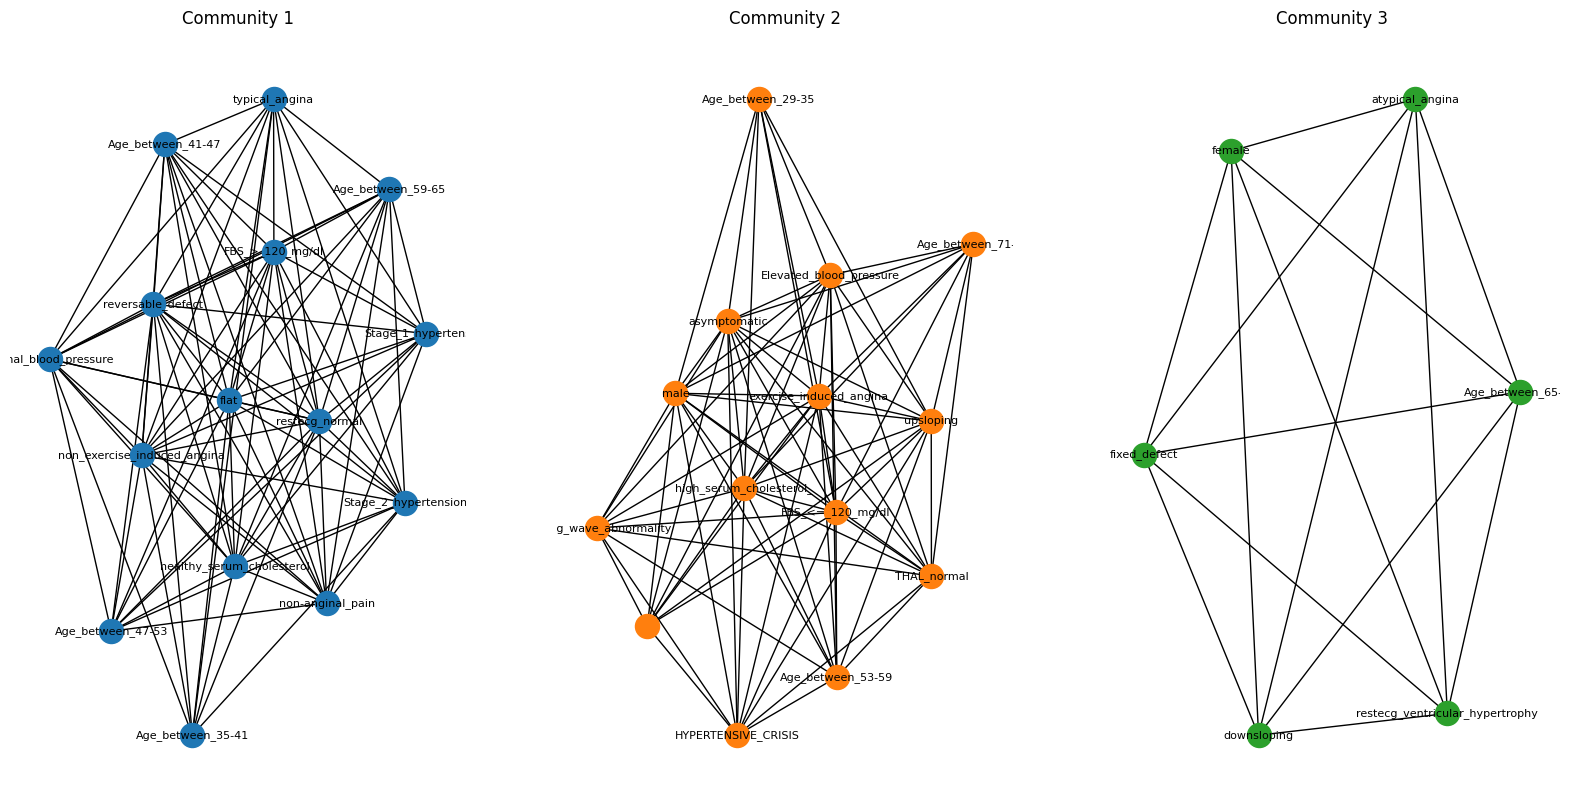

In [ ]:
# Find the communities
communities = sorted(nx.community.greedy_modularity_communities(G,resolution=1.02, cutoff=3), key=len, reverse=True)

# Count the communities
print(f"The coronay diagnosis has {len(communities)} communities.")

'''Add community to node attributes'''
for c, v_c in enumerate(communities):
    for v in v_c:
        # Add 1 to save 0 for external edges
        G.nodes[v]['community'] = c + 1

'''Find internal edges and add their community to their attributes'''
for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
        # Internal edge, mark with community
        G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
        # External edge, mark as 0
        G.edges[v, w]['community'] = 0



N_coms=len(communities)
edges_coms=[]#edge list for each community
coms_G=[nx.Graph() for _ in range(N_coms)] #community graphs
colors=['tab:blue','tab:orange','tab:green']
fig=plt.figure(figsize=(20,10))

for i in range(N_coms):
  edges_coms.append([(u,v,d) for u,v,d in G.edges(data=True) if d['community'] == i+1])#identify edges of interest using the edge attribute
  coms_G[i].add_edges_from(edges_coms[i]) #add edges
  plt.subplot(1,3,i+1)#plot communities
  plt.title('Community '+str(i+1))
  pos = nx.spring_layout(coms_G[i])
  nx.draw(coms_G[i],pos=pos,with_labels=True,node_color=colors[i],font_size=8)

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
from sklearn.cluster import SpectralClustering
from networkx.algorithms.cuts import conductance
from networkx.algorithms.community.quality import modularity

community = list(greedy_modularity_communities(G,resolution=1.02, cutoff=3))
modularity_value = nx.algorithms.community.quality.modularity(G, communities)
print(f"The modularity of the communities is {modularity_value}")
for c in community:
    print(conductance(G, c))

print(f"modularity : ", modularity(G, community))

The modularity of the communities is 0.030373673077296257
0.5384615384615384
0.5686274509803921
0.8136645962732919
modularity :  0.030373673077296257


In [ ]:
community = list(greedy_modularity_communities(G,resolution=1.02, cutoff=3))
print("Cantidad comunidad: ", len(community))
print("Etiqueta comunidades: ", list(range(len(community))))

Longitud comunidad:  3
Cantidad comunidades:  [0, 1, 2]


In [92]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataset = loadtxt('processed_cleveland_NOHS.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:13]
y = dataset[:,13]

In [93]:
model = Sequential()
model.add(Dense(48, input_shape=(13,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [94]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
30/30 [==============================] - 1s 3ms/step - loss: 2.0530 - accuracy: 0.1818
Epoch 2/150
30/30 [==============================] - 0s 3ms/step - loss: -0.7397 - accuracy: 0.1818
Epoch 3/150
30/30 [==============================] - 0s 3ms/step - loss: -2.2842 - accuracy: 0.1987
Epoch 4/150
30/30 [==============================] - 0s 3ms/step - loss: -2.6657 - accuracy: 0.2929
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: -3.7943 - accuracy: 0.2424
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: -4.6113 - accuracy: 0.2189
Epoch 7/150
30/30 [==============================] - 0s 3ms/step - loss: -5.6929 - accuracy: 0.2559
Epoch 8/150
30/30 [==============================] - 0s 3ms/step - loss: -6.4037 - accuracy: 0.2222
Epoch 9/150
30/30 [==============================] - 0s 3ms/step - loss: -7.7481 - accuracy: 0.2660
Epoch 10/150
30/30 [==============================] - 0s 3ms/step - loss: -8.4306 - accuracy: 0.2492


In [83]:
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 48)                672       
                                                                 
 dense_94 (Dense)            (None, 3)                 147       
                                                                 
 dense_95 (Dense)            (None, 1)                 4         
                                                                 
Total params: 823 (3.21 KB)
Trainable params: 823 (3.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [84]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5421
Accuracy: 54.21


In [91]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(20):
 print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

10/10 [==============================] - 0s 2ms/step
[63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0] => 0 (expected 0)
[67.0, 1.0, 4.0, 160.0, 286.0, 0.0, 2.0, 108.0, 1.0, 1.5, 2.0, 3.0, 3.0] => 0 (expected 2)
[67.0, 1.0, 4.0, 120.0, 229.0, 0.0, 2.0, 129.0, 1.0, 2.6, 2.0, 2.0, 7.0] => 0 (expected 1)
[37.0, 1.0, 3.0, 130.0, 250.0, 0.0, 0.0, 187.0, 0.0, 3.5, 3.0, 0.0, 3.0] => 0 (expected 0)
[41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 2.0, 172.0, 0.0, 1.4, 1.0, 0.0, 3.0] => 0 (expected 0)
[56.0, 1.0, 2.0, 120.0, 236.0, 0.0, 0.0, 178.0, 0.0, 0.8, 1.0, 0.0, 3.0] => 0 (expected 0)
[62.0, 0.0, 4.0, 140.0, 268.0, 0.0, 2.0, 160.0, 0.0, 3.6, 3.0, 2.0, 3.0] => 0 (expected 3)
[57.0, 0.0, 4.0, 120.0, 354.0, 0.0, 0.0, 163.0, 1.0, 0.6, 1.0, 0.0, 3.0] => 0 (expected 0)
[63.0, 1.0, 4.0, 130.0, 254.0, 0.0, 2.0, 147.0, 0.0, 1.4, 2.0, 1.0, 7.0] => 0 (expected 2)
[53.0, 1.0, 4.0, 140.0, 203.0, 1.0, 2.0, 155.0, 1.0, 3.1, 3.0, 0.0, 7.0] => 0 (expected 1)
[57.0, 1.0, 4.0, 140.0, 192.0, 0.0, 0

<ipython-input-91-52cb96f07cb3>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


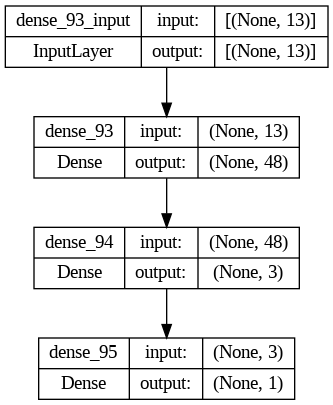

In [88]:
import keras
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)